In [1]:
import pandas as pd
df=pd.read_csv("Encoding Data.csv")

In [2]:
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


In [3]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
oe=OrdinalEncoder()
oe.fit_transform(df[["ord_2"]])


array([[1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.]])

In [4]:
temp=['Cold','Warm','Hot']
enc=OrdinalEncoder(categories=[temp])

In [5]:
enc

OrdinalEncoder(categories=[['Cold', 'Warm', 'Hot']])

In [6]:
enc.fit_transform(df[['ord_2']])

array([[2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.]])

In [7]:
df1=df.copy()
df1["ord_2"]=enc.fit_transform(df[["ord_2"]])
df1

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,2.0
1,1,F,Y,Blue,1.0
2,2,F,N,Blue,0.0
3,3,F,N,Green,1.0
4,4,T,N,Red,0.0
5,5,T,N,Green,2.0
6,6,F,N,Red,0.0
7,7,T,N,Red,0.0
8,8,F,N,Blue,1.0
9,9,F,Y,Red,2.0


In [8]:
oe1=OrdinalEncoder()
oe.fit_transform(df[["nom_0"]])

array([[2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.]])

In [9]:
color=['Green','Blue','Red']
enc1=OrdinalEncoder(categories=[color])
enc1

OrdinalEncoder(categories=[['Green', 'Blue', 'Red']])

In [10]:
enc1.fit_transform(df[['nom_0']])

array([[2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.]])

In [11]:
df2=df1.copy()
df2["nom_0"]=enc1.fit_transform(df[["nom_0"]])
df2

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,2.0,2.0
1,1,F,Y,1.0,1.0
2,2,F,N,1.0,0.0
3,3,F,N,0.0,1.0
4,4,T,N,2.0,0.0
5,5,T,N,0.0,2.0
6,6,F,N,2.0,0.0
7,7,T,N,2.0,0.0
8,8,F,N,1.0,1.0
9,9,F,Y,2.0,2.0


In [13]:
pip install category_encoders


In [15]:
from category_encoders import BinaryEncoder
be=BinaryEncoder()
newdata=be.fit_transform(df2["bin_1"])
newdata

,bin_1_0,bin_1_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1


In [16]:
df3=df2.copy()
df3["bin_1"]=be.fit_transform(df[["bin_1"]])
df3

,id,bin_1,bin_2,nom_0,ord_2
0,0,0,N,2.0,2.0
1,1,0,Y,1.0,1.0
2,2,0,N,1.0,0.0
3,3,0,N,0.0,1.0
4,4,1,N,2.0,0.0
5,5,1,N,0.0,2.0
6,6,0,N,2.0,0.0
7,7,1,N,2.0,0.0
8,8,0,N,1.0,1.0
9,9,0,Y,2.0,2.0


In [17]:
be1=BinaryEncoder()
newdata2=be1.fit_transform(df3['bin_2'])
newdata2

,bin_2_0,bin_2_1
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


In [18]:
df4=df3.copy()
df4["bin_2"]=be1.fit_transform(df[["bin_2"]])
df4

,id,bin_1,bin_2,nom_0,ord_2
0,0,0,0,2.0,2.0
1,1,0,1,1.0,1.0
2,2,0,0,1.0,0.0
3,3,0,0,0.0,1.0
4,4,1,0,2.0,0.0
5,5,1,0,0.0,2.0
6,6,0,0,2.0,0.0
7,7,1,0,2.0,0.0
8,8,0,0,1.0,1.0
9,9,0,1,2.0,2.0


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [25]:
df5=pd.DataFrame(scaler.fit_transform(df4),columns=['id', 'bin_1', 'bin_2', 'nom_0','ord_2'])

In [26]:
df5

,id,bin_1,bin_2,nom_0,ord_2
0,0.000000,0.0,0.0,1.0,1.0
1,0.111111,0.0,1.0,0.5,0.5
2,0.222222,0.0,0.0,0.5,0.0
3,0.333333,0.0,0.0,0.0,0.5
4,0.444444,1.0,0.0,1.0,0.0
5,0.555556,1.0,0.0,0.0,1.0
6,0.666667,0.0,0.0,1.0,0.0
7,0.777778,1.0,0.0,1.0,0.0
8,0.888889,0.0,0.0,0.5,0.5
9,1.000000,0.0,1.0,1.0,1.0


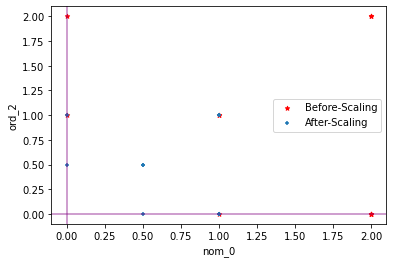

In [27]:
import matplotlib.pyplot as plt
ax=df4.plot.scatter(x="nom_0",y="ord_2",marker="*",label="Before-Scaling",color="red")
df5.plot.scatter(x="nom_0",y="ord_2",marker="+",label="After-Scaling",ax=ax)
plt.axhline(0, color='purple',alpha=0.5)
plt.axvline(0, color='purple',alpha=0.5);
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
Stdscaler=StandardScaler()
df6=pd.DataFrame(Stdscaler.fit_transform(df4),columns=['id', 'bin_1', 'bin_2', 'nom_0','ord_2'])
df6

,id,bin_1,bin_2,nom_0,ord_2
0,-1.566699,-0.654654,-0.5,0.896258,1.324244
1,-1.218544,-0.654654,2.0,-0.384111,0.120386
2,-0.870388,-0.654654,-0.5,-0.384111,-1.083473
3,-0.522233,-0.654654,-0.5,-1.664479,0.120386
4,-0.174078,1.527525,-0.5,0.896258,-1.083473
5,0.174078,1.527525,-0.5,-1.664479,1.324244
6,0.522233,-0.654654,-0.5,0.896258,-1.083473
7,0.870388,1.527525,-0.5,0.896258,-1.083473
8,1.218544,-0.654654,-0.5,-0.384111,0.120386
9,1.566699,-0.654654,2.0,0.896258,1.324244


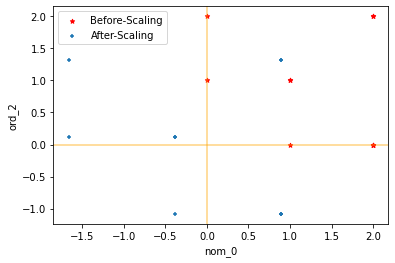

In [41]:
import matplotlib.pyplot as plt
axstd=df4.plot.scatter(x="nom_0",y="ord_2",marker="*",label="Before-Scaling",color="red")
df6.plot.scatter(x="nom_0",y="ord_2",marker="+",label="After-Scaling",ax=axstd)
plt.axhline(0, color='orange',alpha=0.5)
plt.axvline(0, color='orange',alpha=0.5);
plt.show()

In [35]:
from sklearn.preprocessing import MaxAbsScaler
maxabsscaler=MaxAbsScaler()
df7=pd.DataFrame(maxabsscaler.fit_transform(df4),columns=['id', 'bin_1', 'bin_2', 'nom_0','ord_2'])
df7

,id,bin_1,bin_2,nom_0,ord_2
0,0.000000,0.0,0.0,1.0,1.0
1,0.111111,0.0,1.0,0.5,0.5
2,0.222222,0.0,0.0,0.5,0.0
3,0.333333,0.0,0.0,0.0,0.5
4,0.444444,1.0,0.0,1.0,0.0
5,0.555556,1.0,0.0,0.0,1.0
6,0.666667,0.0,0.0,1.0,0.0
7,0.777778,1.0,0.0,1.0,0.0
8,0.888889,0.0,0.0,0.5,0.5
9,1.000000,0.0,1.0,1.0,1.0


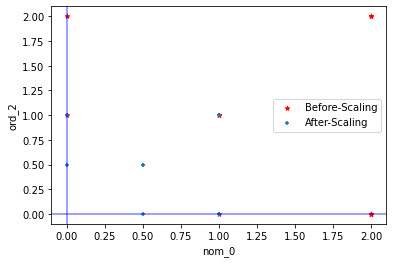

In [36]:
axmax=df4.plot.scatter(x="nom_0",y="ord_2",marker="*",label="Before-Scaling",color="red")
df7.plot.scatter(x="nom_0",y="ord_2",marker="+",label="After-Scaling",ax=axmax)
plt.axhline(0, color='blue',alpha=0.5)
plt.axvline(0, color='blue',alpha=0.5);
plt.show()

In [38]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
df8=pd.DataFrame(rscaler.fit_transform(df4),columns=['id', 'bin_1', 'bin_2', 'nom_0','ord_2'])
df8

,id,bin_1,bin_2,nom_0,ord_2
0,-1.000000,0.000000,0.0,0.5,0.571429
1,-0.777778,0.000000,1.0,-0.5,0.000000
2,-0.555556,0.000000,0.0,-0.5,-0.571429
3,-0.333333,0.000000,0.0,-1.5,0.000000
4,-0.111111,1.333333,0.0,0.5,-0.571429
5,0.111111,1.333333,0.0,-1.5,0.571429
6,0.333333,0.000000,0.0,0.5,-0.571429
7,0.555556,1.333333,0.0,0.5,-0.571429
8,0.777778,0.000000,0.0,-0.5,0.000000
9,1.000000,0.000000,1.0,0.5,0.571429


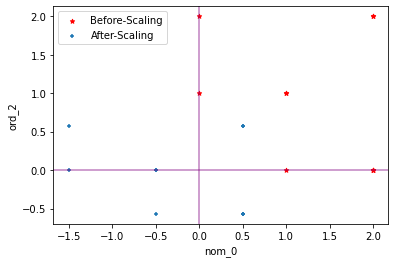

In [39]:
axr=df4.plot.scatter(x="nom_0",y="ord_2",marker="*",label="Before-Scaling",color="red")
df8.plot.scatter(x="nom_0",y="ord_2",marker="+",label="After-Scaling",ax=axr)
plt.axhline(0, color='purple',alpha=0.5)
plt.axvline(0, color='purple',alpha=0.5);
plt.show()